# General relativity using symbolic computer algebra

In [1]:
from gravipy import *
init_printing()

## Tolman-Oppenheimer-Volkoff equation

In [2]:
t, r, theta, phi = symbols(r't, r, \theta, \phi')
x = Coordinates('x', [t, r, theta, phi])
alpha = Function(r'\alpha')
beta = Function(r'\beta')
Metric = diag(-exp(2*alpha(r)), exp(2*beta(r)), r**2, r**2*sin(theta)**2)
g = MetricTensor('g', x, Metric)
Ga = Christoffel('Ga', g)
Ric = Ricci('Ric', g)
Einst = Einstein('Einst', Ric)

The energy-momentum tensor $T_{\mu\nu}$ of an ideal fluid described by its pressure and density in the restframe of a element of the liquid is given by

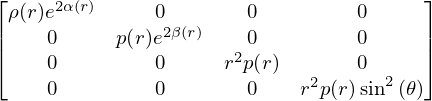

In [3]:
p = Function('p')
rho = Function(r'\rho')
T = Tensor('T', 2, g,
           components=diag(exp(2*alpha(r))*rho(r), exp(2*beta(r))*p(r), r**2*p(r), r**2*sin(theta)**2*p(r)))
T(All, All)

Raising one or two indices, the energy-momentum tensor takes the form

$T^{\mu}_{\nu}$

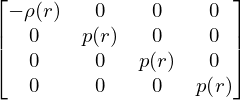

In [4]:
T(-All, All)

$T^{\mu\nu}$

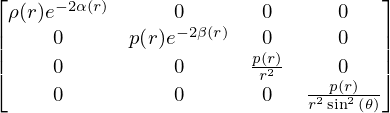

In [5]:
T(-All, -All)

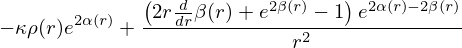

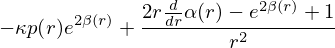

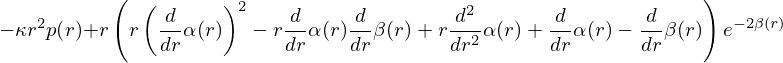

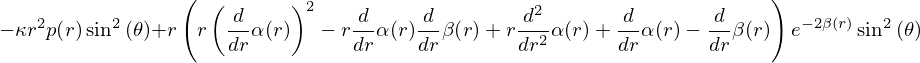

In [6]:
kappa = symbols(r'\kappa')
for n in range(1, 5):
    display(Einst(n, n)-kappa*T(n, n))

We note that the first expression does not depend on $\alpha(r)$ and the fourth expression is proportional to the third expression.

The $tt$-component of the Einstein field equation is simplified by defining a new function
$$m(r) = \frac{4\pi}{\kappa}r\left(1-\mathrm{e}^{-2\beta}\right).$$
Taking the derivative, we find

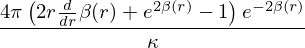

In [7]:
m = symbols('m')
m = 4*pi/kappa*r*(1-exp(-2*beta(r)))
simplify(diff(m, r))

We thus arrive at 
$$\frac{\mathrm{d}m}{\mathrm{d}r} = 4\pi r^2\rho(r)$$
or
$$m(r) = 4\pi\int_0^r\mathrm{d}r'r'^2\rho(r').$$

In order to proceed, it is convenient to consider energy-momentum conservation
$$T^{\mu\nu}{}_{;\mu} = 0,$$
where the semicolon denotes a covariant derivative.

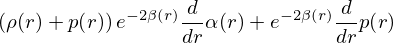

In [8]:
for nu in range(1, 5):
    display(sum(T.covariantD(-n, -nu, n) for n in range(1, 5)))

From the $r$-component, we thus find
$$\frac{\mathrm{d}\alpha}{\mathrm{d}r} = -\frac{1}{\rho c^2+p}\frac{\mathrm{d}p}{\mathrm{d}r}.$$
Inserting this result into the $rr$-component of the Einstein field equation, we arrive at the *Tolman-Oppenheimer-Volkoff* equation
$$\frac{\mathrm{d}p}{\mathrm{d}r} = -\frac{\kappa}{8\pi}\frac{(\rho c^2+p)\left(\dfrac{m(r)c^2}{r}+4\pi r^2p\right)}
                                                             {r\left(1-\dfrac{\kappa}{4\pi}\dfrac{m(r)c^2}{r}\right)}$$